In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+logistique+Cross+validation/Datasets/ex2data1.txt',header=None, names=['Col_1', 'Col_2', "Cible"])

In [3]:
df

,Col_1,Col_2,Cible
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [23]:
display(100*df.isnull().sum()/df.shape[0])

Col_1    0.0
Col_2    0.0
Cible    0.0
dtype: float64

In [4]:
px.scatter(df, x="Col_1", y="Col_2", color="Cible")

In [5]:
# sns.relplot( x="Col_1", y="Col_2",dat = df, hu="Cible")

In [6]:
target_variable = "Cible"

X = df.drop(target_variable, axis = 1)
Y = df.loc[:,target_variable]

In [24]:
display(100*Y.isnull().sum()/Y.shape[0])

0.0

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify =Y)

In [25]:
display(100*Y_train.isnull().sum()/Y_train.shape[0])

0.0

In [8]:
num_features = ['Col_1', 'Col_2']
for f in num_features:
    fig = px.histogram(df, f, color = 'Cible', facet_row = 'Cible', histnorm = 'probability')
    fig.show()

In [9]:
df.describe(include="all")

,Col_1,Col_2,Cible
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [10]:
preprocessor = StandardScaler()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [11]:
classifier = LogisticRegression()

In [12]:
classifier.fit(X_train, Y_train)


LogisticRegression()

In [13]:
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

In [14]:
print("accuracy on training set :", classifier.score(X_train, Y_train))
print("accuracy on test set : ", classifier.score(X_test, Y_test))

accuracy on training set : 0.875
accuracy on test set :  0.95


In [15]:
print("Cross-validated accuracy on training set : ", cross_val_score(LogisticRegression(), X_train, Y_train, scoring="accuracy", cv=10).mean())
print("standard deviation training set : ", cross_val_score(LogisticRegression(), X_train, Y_train, scoring="accuracy", cv=10).std())


Cross-validated accuracy on training set :  0.875
standard deviation training set :  0.11180339887498948


In [16]:
Y_train_proba = classifier.predict_proba(X_train)
Y_test_proba = classifier.predict_proba(X_test)

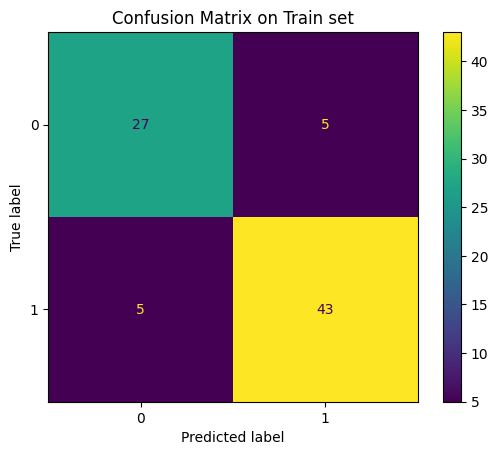

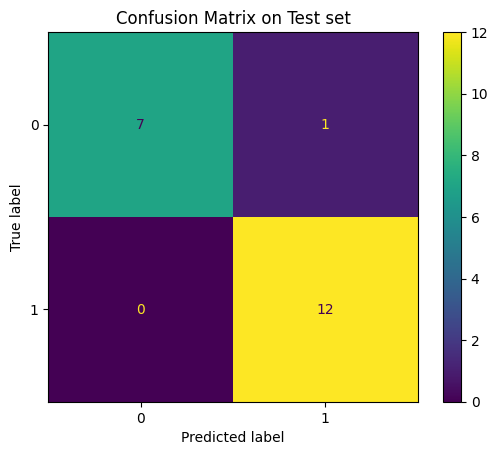

In [17]:
Y_test_proba_ , ax = plt.subplots() 
ax.set(title="Confusion Matrix on Train set") 
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) 
plt.show()

_ , ax = plt.subplots() 
ax.set(title="Confusion Matrix on Test set") 
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax)

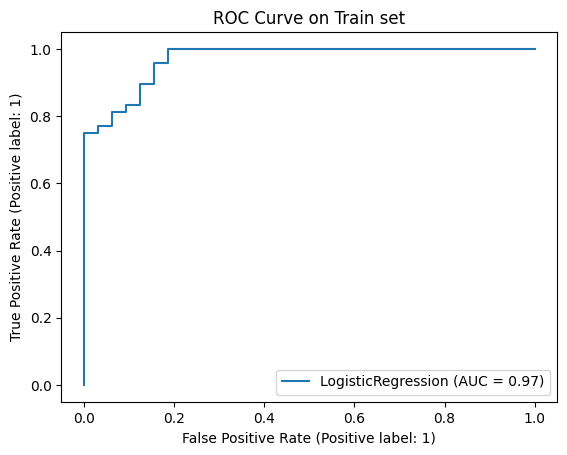

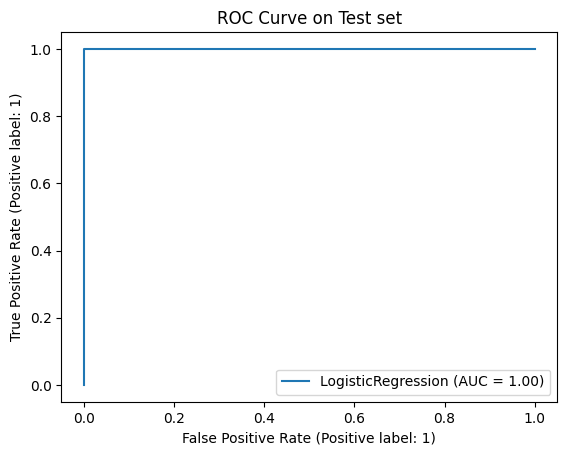

In [18]:
_ , ax = plt.subplots() 
ax.set(title="ROC Curve on Train set") 
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) 
plt.show()

_ , ax = plt.subplots() 
ax.set(title="ROC Curve on Test set") 
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) 
plt.show()

In [19]:
prédictions_df_train = pd.DataFrame(X_train, columns=["Col_1", "Col_2"])

In [20]:
prédictions_df_train["Y"] = Y_train

In [21]:
prédictions_df_train["Y_pred"] = Y_train_pred

In [22]:
prédictions_df_train["proba"] = Y_train_proba[:1]

ValueError: Length of values (1) does not match length of index (80)

In [ ]:
fig = px.scatter_3d(pred)